# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [20]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [37]:
import numpy as np

def polynomial(x, m):
    xn = len(x) 
    A = np.array([[0] * m for i in range(xn)]) # массив xn на m из нулей
    
    for i in range(xn):
        for j in range(m):
            A[i][j] =(x[i])**(j)
    return(np.linalg.solve ((A.T @ A), (A.T @ y)))

print(polynomial(x,3))

[-1.08189366 -0.08162092  0.88084412]


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [62]:
def sigma(m):
    xn = len(x)
    s = 0
    xs = []
    
   # def xsk(a):
   #     for i in range(m):
   #         xs.append(a**i)
   #     return np.array(xs)

    for i in range(xn):
        #print(np.shape(xsk(x[i])))
        #print(np.shape(polynomial(x, m)))
        s += (np.polyval(polynomial(x, m)[::-1], x[i])  - y[i])**2
    return (s / (xn - m))
print(sigma(10))

0.8468516465004446


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

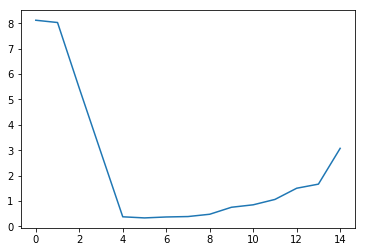

In [63]:
import matplotlib.pyplot as plt

xn = len(x)

sigm_graph = []
for i in range(xn):
    sigm_graph.append(sigma(i))
    
plt.plot(sigm_graph)
plt.show()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [81]:
m = 4
xn = len(x) 
A = np.array([[0] * m for i in range(xn)])

for i in range(xn):
    for j in range(m):
        A[i][j] =(x[i])**(j)

print("er "+ str(np.linalg.norm(polynomial(x,m) - np.linalg.solve(np.linalg.qr(A, mode = 'complete')[1][:m], (np.linalg.qr(A, mode = 'complete')[0].T @ y)[:m]))))

er 1.7967433385776465e-14


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

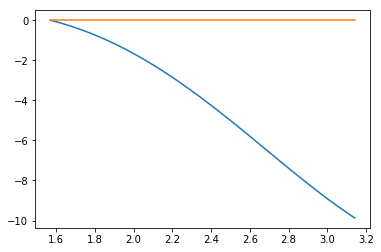

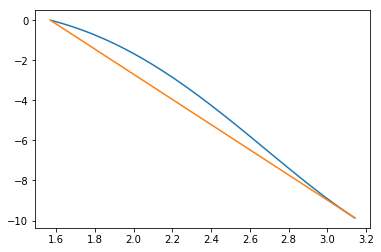

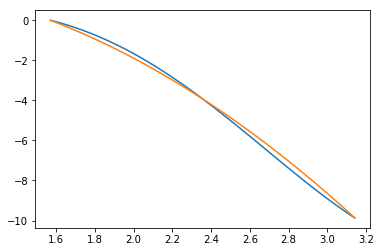

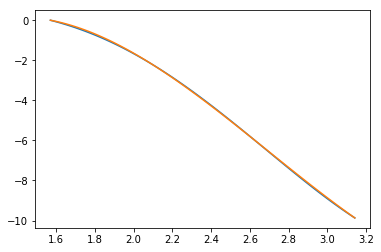

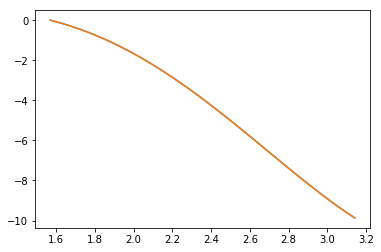

In [169]:
def lagranz(x, y, p):
    xn = x.shape[0]
    
    out = 0
    for j in range(xn):
        prod = 1
        for i in range(xn):
            if i != j:
                prod *= (p - x[i]) / (x[j] - x[i])
        out += y[j] * prod
    return out

xdata = np.linspace(np.pi/2, np.pi, 100)

def ydata(x):
    return x**2 * np.cos(x)

def lagr(x):
    l = []
    for i in range(len(xdata)):
        l.append(lagranz(x, ydata(x), xdata[i]))
    return(l)

def xun(m):
    return(np.linspace(np.pi/2, np.pi, m))

for m in range(1, 6):
    
    
    plt.plot(xdata, ydata(xdata))
    plt.plot(xdata, lagr(xun(m)))

    plt.show()


### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

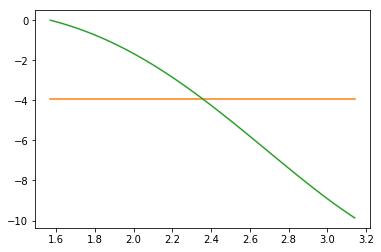

C:\Users\Arslan\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


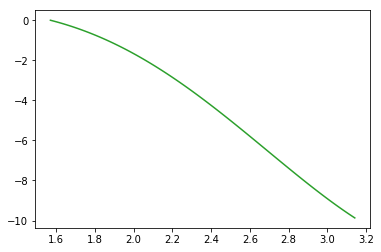

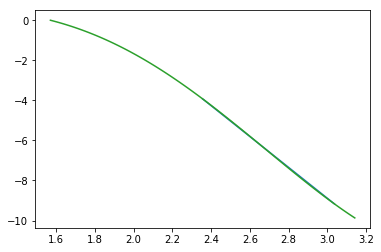

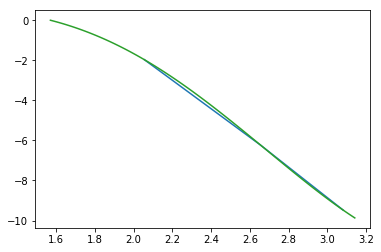

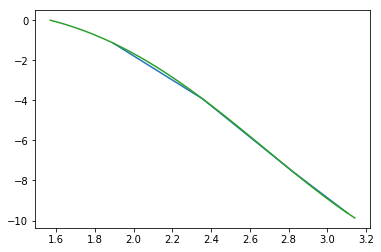

2.739751025969677 inf


In [178]:
def xcheb(m):
        c = []
        for i in range(m):
            c.append(np.pi * 3 / 4 + np.pi / 4 * np.cos((2*i - 1) * np.pi / 2 / m))
        return(np.array(c))
    
for m in range(1, 6):
    
    plt.plot(xcheb(m), ydata(xcheb(m)))
    plt.plot(xdata, lagr(xcheb(m)))
    plt.plot(xdata, ydata(xdata))

    plt.show()
    
m = 3

sl=0
sc=0

for i in range(len(xdata)):
    sl += (lagr(xun(m))[i] - ydata(xdata)[i])**2 / ((ydata(xdata)[i])**2)
    sc += (lagr(xcheb(m))[i] - ydata(xdata)[i])**2 / ((ydata(xdata)[i])**2)
print(sl, sc)